In [1]:
import pandas as pd
from scipy import sparse # cargar matrices dispersas
from sklearn import model_selection #division de datos
from sklearn.svm import SVC #cargamos el modelo SVM

In [2]:
#metodo para importar datos x, y
def importarDatos (nombre_vector_tfidf, nombreDataset): #carga datos para entrenamiento y prueba
    #cargamos vector de caracteristicas TF-IDF
    tfidf_vector = sparse.load_npz("3.Extraccion_caracteristicas/"+nombre_vector_tfidf)
    x = tfidf_vector.toarray()
    #Cargamos el dataset unido y etiquetado
    tweet_data_df = pd.DataFrame(pd.read_excel(nombreDataset))
    y = tweet_data_df["sentimiento"]
    return x, y

In [10]:
import matplotlib.pyplot as plt
#metodo para graficar datos de entrenamiento y prueba
def graficarDivisionDatos(X_train, X_test):
    col_map = plt.get_cmap('tab10') # color barras
    values = [len(X_train), len(X_test)] 
    labels = ['Entrenamiento', 'Prueba'] 
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
        return my_autopct
    plt.rcParams["figure.facecolor"] = "w"
    plt.pie(values,
           labels=labels,
           colors=col_map.colors,
           textprops={'color':"black",'fontweight':'heavy'},
           shadow=True,
           explode=[0,0.1],
           autopct=make_autopct(values))
    
    plt.title("Division del dataset en datos\n" + "entrenamiento y prueba", bbox={'facecolor':'0.8', 'pad':5})
    plt.show()

In [4]:
#Metodo para graficar la matriz de confusion
from sklearn.metrics import ConfusionMatrixDisplay

def graficar_MatrizConfusion(y_test, predictions):
    cf_matrix=confusion_matrix(y_test,predictions)
    labels=['No depresivo','Depresivo']#modelo_SVM.classes_   1--depresivo
    cm_display = ConfusionMatrixDisplay(cf_matrix, display_labels=labels)
    #print(modelo_SVM.classes_)
    dp=cm_display.plot(cmap=plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.rcParams["figure.facecolor"] = "w"
    dp.ax_.set_title('Matriz de Confusion', fontsize=13)
    plt.show()

In [5]:
#Metodo para calcular la validacion cruzada
def validacion_cruzada(modelo_SVM, X_train, y_train):
    scoring = 'accuracy'
    seed=7
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True) ##shuffle para activar el random state
    cv_results = model_selection.cross_val_score(modelo_SVM, X_train, y_train, cv=kfold, scoring=scoring)

    print("Iteraciones validacion cruzada:\n",cv_results)
    msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
    print("Precision media:\n",msg)

# División de datos en conjuntos de prueba y entrenamiento con Unigramas

### División de datos de entrenamiento y prueba

In [6]:
#Cargamos los datos (variable/s independiente y dependendiente)
x_U, y_U = importarDatos("tfidf_Unigrama.npz","Dataset_unido.xlsx")
#separamos los datos en los conjuntos de entrenamiento prueba
seed = 7
X_train_U, X_test_U, y_train_U, y_test_U = model_selection.train_test_split(x_U, y_U, test_size=0.2, random_state=seed) # 80% training y 20% test

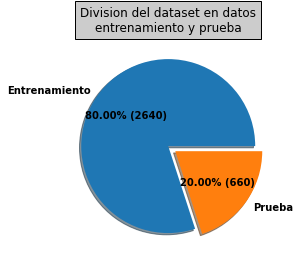

In [11]:
#graficamos la division de datos de entrenamiento y prueba
graficarDivisionDatos(X_train_U, X_test_U)

### Entrenamiento del modelo

In [12]:
# Creamos el Clasificador svm
modelo_SVM_unigrama = SVC(kernel = 'linear') 
#Entrena el modelo usando los conjuntos de entrenamiento.
modelo_SVM_unigrama.fit(X_train_U, y_train_U)

SVC(kernel='linear')

### Evaluación del rendimiento del modelo con Validación Cruzada

Validacion cruzada

In [13]:
#calculamos la validacion cruzada con los datos de entrenamiento 
validacion_cruzada(modelo_SVM_unigrama, X_train_U, y_train_U)

Iteraciones validacion cruzada:
 [0.97727273 0.97348485 0.97916667 0.96969697 0.97727273]
Precision media:
 0.975379 (0.003388)


In [14]:
# Hacemos Cross-Validation usando K-folds con 5 splits
# Comparamos los resultados obtenidos en el modelo inicial, en el cross validation y vemos que son similares.

In [15]:
#EXPLICAR QUE ES SPLITS=5, Y EL .std

# nuestro conjunto de datos de entrenamiento, se divide en 5 partes, 
#   entrena en 4, valida en 1 y repite el proceso 5 veces.


### Evaluación del modelo con métricas de evaluacion.

In [16]:
# Importar el módulo de métricas de scikit-learn para el cálculo de precisión
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Predecir la respuesta para el conjunto de datos de prueba
predictions_U = modelo_SVM_unigrama.predict(X_test_U)
# Precisión del modelo.
print("Exactitud (Accuracy):", accuracy_score(y_test_U, predictions_U))
print(classification_report(y_test_U,predictions_U))

Exactitud (Accuracy): 0.9848484848484849
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       327
           1       0.99      0.98      0.98       333

    accuracy                           0.98       660
   macro avg       0.98      0.98      0.98       660
weighted avg       0.99      0.98      0.98       660



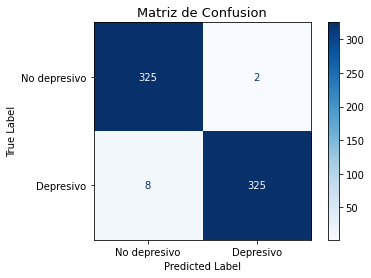

In [19]:
#Graficamos la matriz de confusion para visualizar el desempeño del algoritmo
graficar_MatrizConfusion(y_test_U, predictions_U)

# División de datos en conjuntos de prueba y entrenamiento con Bigramas

### División de datos de entrenamiento y prueba

In [20]:
#Cargamos los datos
x_B, y_B = importarDatos("tfidf_Bigrama.npz","Dataset_unido.xlsx")
#separamos los datos en los conjuntos de entrenamiento prueba
seed = 7
X_train_B, X_test_B, y_train_B, y_test_B = model_selection.train_test_split(x_B, y_B, test_size=0.2, random_state=seed) # 80% training y 20% test

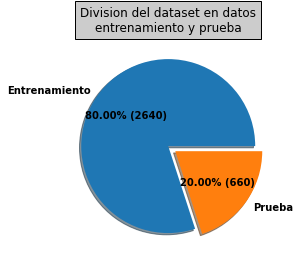

In [21]:
#graficamos la division de datos de entrenamiento y prueba
graficarDivisionDatos(X_train_B, X_test_B)

### Entrenamiento del modelo

In [22]:
# Creamos el Clasificador svm
modelo_SVM_bigrama = SVC(kernel = 'linear') 
#Entrena el modelo usando los conjuntos de entrenamiento.
modelo_SVM_bigrama.fit(X_train_B, y_train_B)

SVC(kernel='linear')

### Evaluación del rendimiento del modelo con Validación Cruzada

In [23]:
#calculamos la validacion cruzada con los datos de entrenamiento 
validacion_cruzada(modelo_SVM_bigrama, X_train_B, y_train_B)

Iteraciones validacion cruzada:
 [0.8030303  0.76136364 0.77083333 0.77083333 0.75568182]
Precision media:
 0.772348 (0.016398)


### Evaluación del modelo con métricas de evaluacion.

In [24]:
# Importar el módulo de métricas de scikit-learn para el cálculo de precisión
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Predecir la respuesta para el conjunto de datos de prueba
predictions_B = modelo_SVM_bigrama.predict(X_test_B)
# Precisión del modelo.
print("Exactitud (Accuracy):", accuracy_score(y_test_B, predictions_B))
print(classification_report(y_test_B,predictions_B))


Exactitud (Accuracy): 0.7848484848484848
              precision    recall  f1-score   support

           0       0.72      0.94      0.81       327
           1       0.91      0.63      0.75       333

    accuracy                           0.78       660
   macro avg       0.81      0.79      0.78       660
weighted avg       0.82      0.78      0.78       660



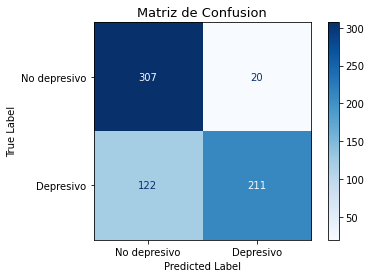

In [25]:
#Graficamos la matriz de confusion para visualizar el desempeño del algoritmo
graficar_MatrizConfusion(y_test_B, predictions_B)

# División de datos en conjuntos de prueba y entrenamiento con Trigramas

### División de datos de entrenamiento y prueba

In [26]:
#Cargamos los datos
x_T, y_T = importarDatos("tfidf_Trigrama.npz","Dataset_unido.xlsx")
#separamos los datos en los conjuntos de entrenamiento y prueba
seed = 7
X_train_T, X_test_T, y_train_T, y_test_T = model_selection.train_test_split(x_T, y_T, test_size=0.2, random_state=seed) # 80% training y 20% test

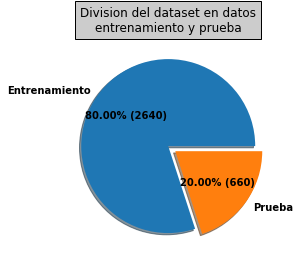

In [27]:
#graficamos la division de datos de entrenamiento y prueba
graficarDivisionDatos(X_train_T, X_test_T)

### Entrenamiento del modelo

In [28]:
# Creamos el Clasificador svm
modelo_SVM_trigrama = SVC(kernel = 'linear') 
#Entrena el modelo usando los conjuntos de entrenamiento.
modelo_SVM_trigrama.fit(X_train_T, y_train_T)

SVC(kernel='linear')

### Evaluación del rendimiento del modelo con Validación Cruzada

In [29]:
#calculamos la validacion cruzada con los datos de entrenamiento 
validacion_cruzada(modelo_SVM_trigrama, X_train_T, y_train_T)

Iteraciones validacion cruzada:
 [0.64204545 0.58143939 0.60037879 0.625      0.60984848]
Precision media:
 0.611742 (0.020712)


### Evaluación del modelo con métricas de evaluacion.

In [30]:
#Importar el módulo de métricas de scikit-learn para el cálculo de precisión
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Predecir la respuesta para el conjunto de datos de prueba
predictions_T = modelo_SVM_trigrama.predict(X_test_T)
# Precisión del modelo.
print("Exactitud (Accuracy):", accuracy_score(y_test_T, predictions_T))
print(classification_report(y_test_T,predictions_T))


Exactitud (Accuracy): 0.6151515151515151
              precision    recall  f1-score   support

           0       0.56      0.98      0.72       327
           1       0.93      0.26      0.40       333

    accuracy                           0.62       660
   macro avg       0.75      0.62      0.56       660
weighted avg       0.75      0.62      0.56       660



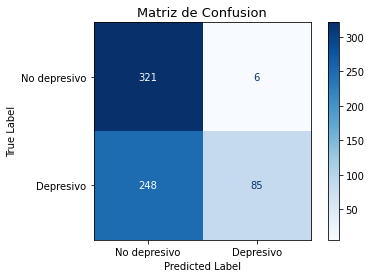

In [31]:
#Graficamos la matriz de confusion para visualizar el desempeño del algoritmo
graficar_MatrizConfusion(y_test_T, predictions_T)

## Comparación del rendimiento de los modelos

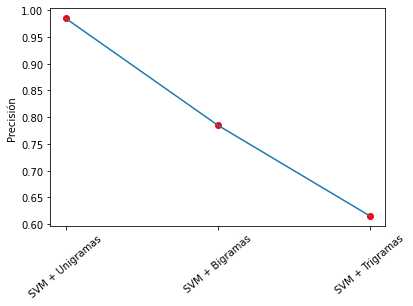

In [33]:
#Comparamos los 3 modelos SVM con N-gramas
precisionModelos =[]

precisionModelos.append(accuracy_score(y_test_U, predictions_U))
precisionModelos.append(accuracy_score(y_test_B, predictions_B))
precisionModelos.append(accuracy_score(y_test_T, predictions_T))

#Graficamos
plt.scatter(range(1, 4), precisionModelos, color='red')
plt.plot(range(1, 4), precisionModelos)
plt.xticks([1, 2, 3], ['SVM + Unigramas', 'SVM + Bigramas', 'SVM + Trigramas'], rotation=40)
plt.ylabel('Precisión')
plt.show()

Guardamos el mejor modelo

In [34]:
#Exportamos el modelo de svm con unigramas dado que es el que brinda una mejor precision
import joblib 
joblib.dump(modelo_SVM_unigrama, 'modelo_SVM_Unigram.pkl') # Guarda el modelo.
#modelo_SVM_unigrama = joblib.load('modelo_SVM_Unigram.pkl') # para cargar el modelo
#puede almacenar o confirmar en Git este modelo y 
#    ejecutarlo en datos de prueba no vistos sin necesidad de volver a entrenar el modelo desde cero

['modelo_SVM_Unigram.pkl']